In [1]:
#IMPORT NECESSARY PACKAGES
import CO2_functions
import CO2_Processing
import pandas as pd
from CO2_functions import *
from CO2_Processing import *
import matplotlib.pyplot as plt
import pickle
import numpy as np
pd.options.display.max_rows = 999
from datetime import datetime
import os

In [96]:
import importlib
importlib.reload(CO2_functions)
importlib.reload(CO2_Processing)

from CO2_functions import *
from CO2_Processing import *

In [107]:
data = retrieve_data_from_folder('Z:\\CO2_Data')

Enter Start Date YYYY-mm-DD:  2019-08-15
Enter End Date YYYY-mm-DD:  2019-08-21


Retrieving data for 2019-08-15
Retrieving data for 2019-08-16
Retrieving data for 2019-08-17
Retrieving data for 2019-08-18
Retrieving data for 2019-08-19
Retrieving data for 2019-08-20
Retrieving data for 2019-08-21


In [108]:
data = remove_spikes(pd.read_pickle('Spike_ETs.pkl'),data)
data = downsample_and_concatenate(data) 
data = combine_vent_data(data)
data['Vent_Mass'] = moving_mass_flow(data['Vent_Mass'])

Concatenating Picarro Data
Concatenating Multi Data
setting night vent data to zero


In [110]:
for i in range(1,4):
    data['Multi'].loc[(data['Multi']['CO2_{}'.format(i)] < 395)|(data['Multi']['CO2_{}'.format(i)] > 600)] = float('NaN')
data['Multi'].interpolate(limit=1,inplace=True)

In [129]:
multi

,CO2_1,CO2_2,CO2_3,Temp,Rotations,Wind_Velocity,Wind_Direction,Multi_Loc,DOW
Corrected_DT,,,,,,,,,
2019-08-15 09:34:19,433.04,430.11,NaN,NaN,1.0,1.010,167.0,1.0,3.0
2019-08-15 09:34:20,431.09,431.09,NaN,NaN,0.8,0.808,167.0,1.0,3.0
2019-08-15 09:34:21,433.04,432.06,430.110,32.44,NaN,NaN,NaN,1.0,3.0
2019-08-15 09:34:22,432.55,432.06,430.306,32.44,NaN,NaN,NaN,1.0,3.0
2019-08-15 09:34:23,432.06,432.06,NaN,NaN,NaN,NaN,NaN,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2019-08-21 18:13:32,NaN,NaN,NaN,NaN,2.0,2.010,197.0,NaN,2.0
2019-08-21 18:13:33,NaN,NaN,NaN,NaN,2.0,2.010,187.0,NaN,2.0
2019-08-21 18:13:34,NaN,NaN,NaN,NaN,2.0,2.010,190.0,NaN,2.0


In [135]:
#data['Multi'] = data['Multi'].resample('1T').agg(dict(Rotations='sum',Wind_Velocity='mean',Wind_Direction = 'mean'))


,CO2_1,CO2_2,CO2_3,Temp,Rotations,Wind_Velocity,Wind_Direction,Multi_Loc,DOW
Corrected_DT,,,,,,,,,
2019-08-15 09:34:19,433.04,430.11,NaN,NaN,1.0,1.010,257.0,1.0,3.0
2019-08-15 09:34:20,431.09,431.09,NaN,NaN,0.8,0.808,257.0,1.0,3.0
2019-08-15 09:34:21,433.04,432.06,430.110,32.44,NaN,NaN,NaN,1.0,3.0
2019-08-15 09:34:22,432.55,432.06,430.306,32.44,NaN,NaN,NaN,1.0,3.0
2019-08-15 09:34:23,432.06,432.06,NaN,NaN,NaN,NaN,NaN,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2019-08-21 18:13:32,NaN,NaN,NaN,NaN,2.0,2.010,287.0,NaN,2.0
2019-08-21 18:13:33,NaN,NaN,NaN,NaN,2.0,2.010,277.0,NaN,2.0
2019-08-21 18:13:34,NaN,NaN,NaN,NaN,2.0,2.010,280.0,NaN,2.0


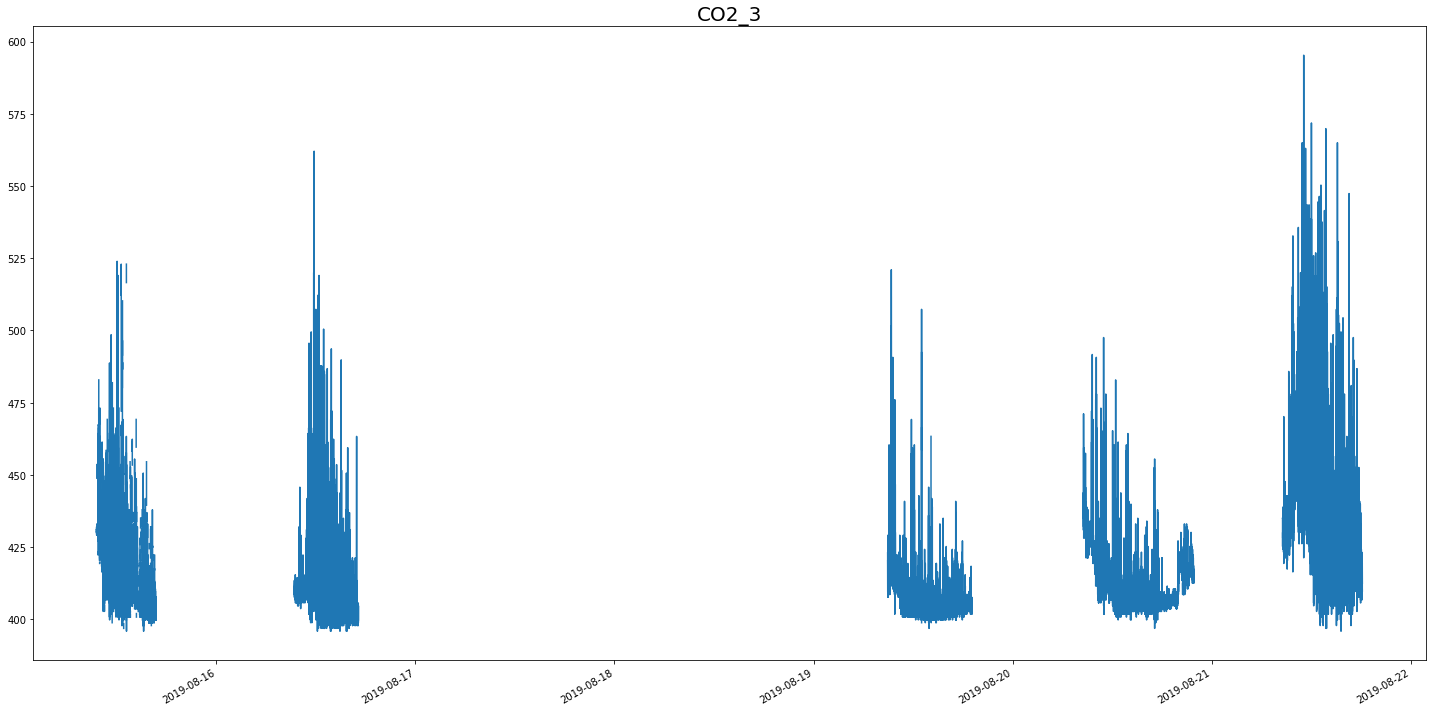

Is this an acceptable range?  y


[              Corrected_DT   CO2_1  Multi_Loc   CO2_2    CO2_3   Temp  \
 0      2019-08-15 09:34:19  433.04        1.0  430.11      NaN    NaN   
 1      2019-08-15 09:34:20  431.09        1.0  431.09      NaN    NaN   
 2      2019-08-15 09:34:21  433.04        1.0  432.06  430.110  32.44   
 3      2019-08-15 09:34:22  432.55        1.0  432.06  430.306  32.44   
 4      2019-08-15 09:34:23  432.06        1.0  432.06      NaN    NaN   
 ...                    ...     ...        ...     ...      ...    ...   
 549553 2019-08-21 18:13:32     NaN        NaN     NaN      NaN    NaN   
 549554 2019-08-21 18:13:33     NaN        NaN     NaN      NaN    NaN   
 549555 2019-08-21 18:13:34     NaN        NaN     NaN      NaN    NaN   
 549556 2019-08-21 18:13:35     NaN        NaN     NaN      NaN    NaN   
 549557 2019-08-21 18:13:36     NaN        NaN     NaN      NaN    NaN   
 
         Rotations  Wind_Velocity  Wind_Direction  DOW  
 0             1.0          1.010           347.0  3.

In [114]:
plot_refinement_all([[data['Multi'],'Corrected_DT','CO2_3']],'separate')

In [92]:
#pic.set_index('Corrected_DT',inplace=True)
pic_10 = pic.resample("10T").agg(dict(Pic_CO2='max',Pic_CH4='max',ANEM_Y='mean',ANEM_X='mean',ANEM_Z='mean',Pic_Loc = 'last'))
pic_10 = wind_add(pic_10,'ANEM_X','ANEM_Y')

In [140]:
multi = data['Multi']
multi = multi[['CO2_1','CO2_2','CO2_3','Temp','Rotations','Wind_Velocity','Wind_Direction','Multi_Loc','DOW']]
multi = multi_direction_correction(multi)
multi.columns = ['CO2_1','CO2_2','CO2_3','Temp','Rotations','ws','wd','Multi_Loc','DOW']
multi1 = multi.loc[multi['ws']>2.0].dropna()

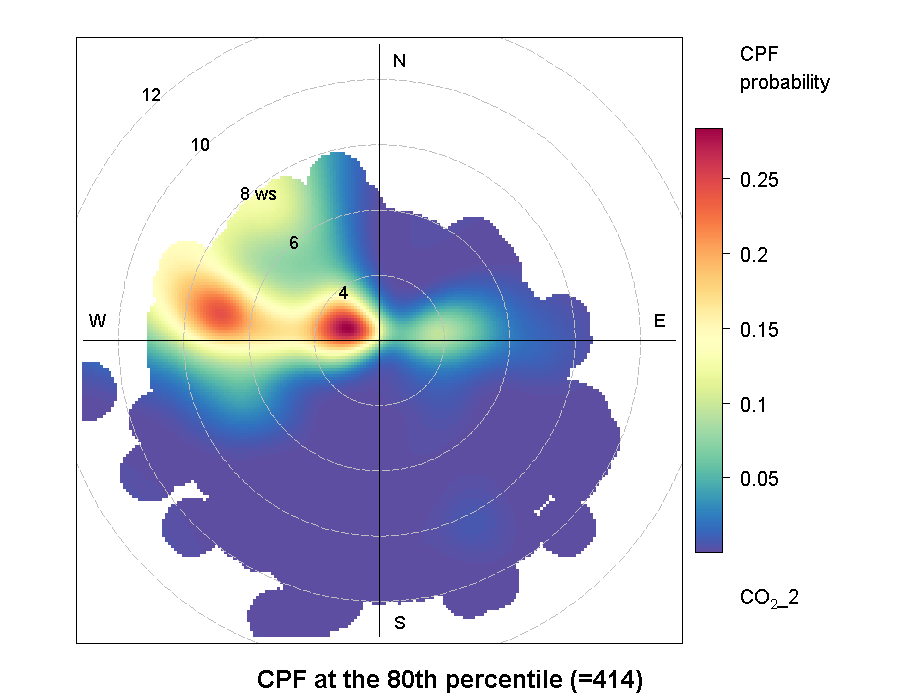

In [143]:
#Import everything to view graphics
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.lib import grdevices
base = importr('base')
utils = importr('utils')
import IPython
from IPython.display import Image, display
graphics = importr('graphics')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
if not ro.packages.isinstalled('openair'):
    utils.install_packages('openair')

df = multi1

    
r=ro.r #set r object to "r"
r.library('openair') #load library openair

pandas2ri.activate() #activate the pandas to r dataframe function
r_dataframe = pandas2ri.py2ri(df) #convert pandas df to r df

with rpy2.robjects.lib.grdevices.render_to_bytesio(grdevices.png, width=900, height=700, res=150) as img: #graphical settings
    #r.polarAnnulus(r_dataframe,poll = pollutant,period='hour',main='Hour',width = 'fat')  # setup plot through r
    r.polarPlot(r_dataframe,poll='CO2_2',statistic='cpf',percentile=80)  # setup plot through r

IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True)) #display plot